In [100]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [101]:
dir = ""

In [102]:
team_att_df = pd.read_csv(dir + "team_attributes.csv")

league_df = pd.read_csv(dir + "league.csv")

player_att_match_df = pd.read_csv(dir+"player_attributes_by_match.csv")
player_att_match_df = player_att_match_df.drop('Unnamed: 0', axis=1)

team_df = pd.read_csv(dir + "team.csv", encoding = "ISO-8859-1")

In [103]:
team_att_df.head()

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,9/19/14 0:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,9/10/15 0:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,2/22/10 0:00,70,Fast,NaN,Little,70,Long,Organised,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,2/22/11 0:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [104]:
team_att_df["date"] = pd.to_datetime(team_att_df["date"])

team_att_df['year'] = team_att_df['date'].dt.year

In [105]:
team_att_df.groupby(["team_id", "date"]).size().value_counts()

1    1456
2       1
dtype: int64

In [106]:
team_att_df.groupby("team_id").size().value_counts()

6    189
5     28
3     20
2     19
4     18
1     14
dtype: int64

In [107]:
team_att_df.groupby("team_id")['year'].nunique().value_counts()

6    189
5     28
3     20
4     18
2     18
1     15
Name: year, dtype: int64

In [108]:
team_att_df = team_att_df.drop(['year'], axis=1)

In [109]:
team_att_df.shape

(1458, 23)

In [110]:
team_att_df.isnull().sum()

team_id                             0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

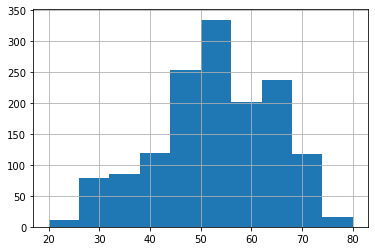

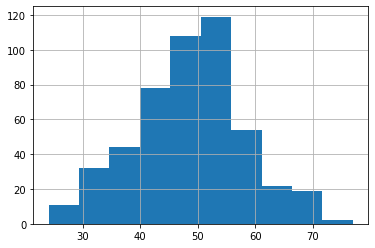

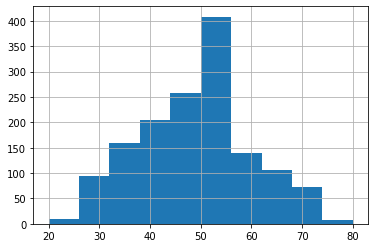

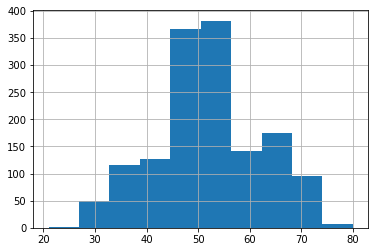

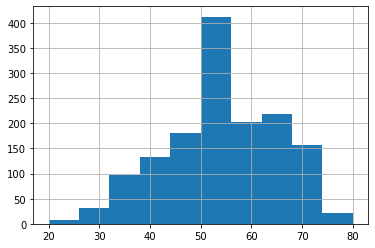

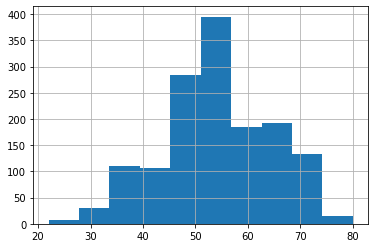

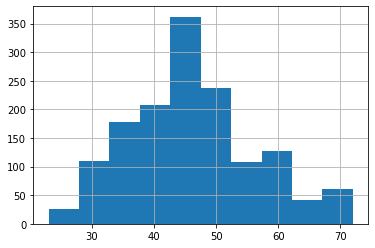

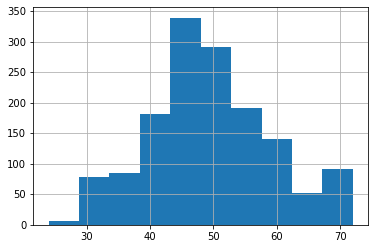

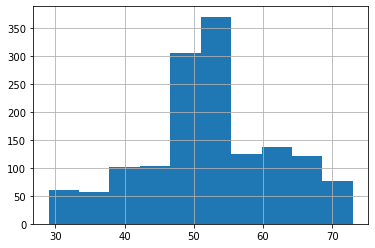

In [111]:
numeric_cols = team_att_df.select_dtypes([np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ["date", "team_id", "player_id", "year"]]
numeric_cols

for col in numeric_cols:
    team_att_df[col].hist()
    plt.show()

In [112]:
team_att_df.groupby("buildUpPlaySpeedClass")["buildUpPlaySpeed"].mean()

buildUpPlaySpeedClass
Balanced    51.925676
Fast        69.767442
Slow        29.509804
Name: buildUpPlaySpeed, dtype: float64

In [113]:
team_att_df.groupby("buildUpPlayPassingClass")["buildUpPlayPassing"].mean()

buildUpPlayPassingClass
Long     70.234043
Mixed    48.773463
Short    29.789062
Name: buildUpPlayPassing, dtype: float64

In [114]:
#team_att_df.groupby("buildUpPlayPositioningClass")["buildUpPlayPositioning"].mean()

In [115]:
team_att_df.groupby("chanceCreationPassingClass")["chanceCreationPassing"].mean()

chanceCreationPassingClass
Normal    50.762794
Risky     69.409357
Safe      30.339286
Name: chanceCreationPassing, dtype: float64

In [116]:
team_att_df.groupby("chanceCreationCrossingClass")["chanceCreationCrossing"].mean()

chanceCreationCrossingClass
Little    29.711538
Lots      70.127962
Normal    51.882008
Name: chanceCreationCrossing, dtype: float64

In [117]:
team_att_df.groupby("chanceCreationShootingClass")["chanceCreationShooting"].mean()

chanceCreationShootingClass
Little    29.513514
Lots      70.091371
Normal    52.113562
Name: chanceCreationShooting, dtype: float64

In [118]:
#team_att_df.groupby("chanceCreationPositioningClass")["chanceCreationPositioning"].mean()

In [119]:
team_att_df.groupby("defencePressureClass")["defencePressure"].mean()

defencePressureClass
Deep      29.636364
High      69.819672
Medium    46.878520
Name: defencePressure, dtype: float64

In [120]:
team_att_df.groupby("defenceAggressionClass")["defenceAggression"].mean()

defenceAggressionClass
Contain    30.082353
Double     69.727273
Press      48.938776
Name: defenceAggression, dtype: float64

In [121]:
team_att_df.groupby("defenceTeamWidthClass")["defenceTeamWidth"].mean()

defenceTeamWidthClass
Narrow    30.245902
Normal    51.756610
Wide      69.216216
Name: defenceTeamWidth, dtype: float64

In [122]:
[c for c in team_att_df.columns if "Class" in c]

['buildUpPlaySpeedClass',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassingClass',
 'chanceCreationCrossingClass',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressureClass',
 'defenceAggressionClass',
 'defenceTeamWidthClass',
 'defenceDefenderLineClass']

In [123]:
team_att_df.groupby("buildUpPlayPositioningClass").size()

buildUpPlayPositioningClass
Free Form      72
Organised    1386
dtype: int64

In [124]:
team_att_df.groupby("defenceDefenderLineClass").size()

defenceDefenderLineClass
Cover           1362
Offside Trap      96
dtype: int64

In [125]:
temp = team_att_df.groupby(["team_id", "buildUpPlayDribblingClass"])["buildUpPlayDribbling"].mean().reset_index()
for t in temp["team_id"].unique():
    print(temp.loc[temp["team_id"]==t])
    print("-------------------------------")

   team_id buildUpPlayDribblingClass  buildUpPlayDribbling
0     1601                    Little                   NaN
1     1601                    Normal                  48.0
-------------------------------
   team_id buildUpPlayDribblingClass  buildUpPlayDribbling
2     1773                    Little                   NaN
3     1773                    Normal                  51.0
-------------------------------
   team_id buildUpPlayDribblingClass  buildUpPlayDribbling
4     1957                    Little                   NaN
5     1957                    Normal                  54.0
-------------------------------
   team_id buildUpPlayDribblingClass  buildUpPlayDribbling
6     2033                    Little                   NaN
7     2033                    Normal                  62.0
-------------------------------
   team_id buildUpPlayDribblingClass  buildUpPlayDribbling
8     2182                    Little                   NaN
9     2182                    Normal          

     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
184     8535                    Little                   NaN
185     8535                    Normal                  54.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
186     8537                    Little                   NaN
187     8537                    Normal                  58.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
188     8540                    Little                   NaN
189     8540                    Normal                  60.5
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
190     8543                    Little                   NaN
191     8543                      Lots                  69.0
192     8543                    Normal                  65.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
193     8548      

386     9869                    Normal                  48.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
387     9873                    Little                   NaN
388     9873                    Normal                  59.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
389     9874                    Little                   NaN
390     9874                    Normal                  62.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
391     9875                    Little                   NaN
392     9875                      Lots                  72.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUpPlayDribbling
393     9876                    Little                  29.0
394     9876                    Normal                  46.0
-------------------------------
     team_id buildUpPlayDribblingClass  buildUp

In [126]:
temp.groupby("buildUpPlayDribblingClass").agg({"buildUpPlayDribbling": ["std", "mean"]})

buildUpPlayDribbling           
                                           std       mean
buildUpPlayDribblingClass                                
Little                                2.587603  30.450000
Lots                                  2.351418  69.937500
Normal                                7.059433  48.915663

In [127]:
drib_map = team_att_df.groupby("buildUpPlayDribblingClass")["buildUpPlayDribbling"].mean().to_dict()

team_att_df["buildUpPlayDribbling_imp"] = team_att_df["buildUpPlayDribblingClass"].map(drib_map)

In [128]:
team_att_df["buildUpPlayDribbling_imp"] = np.where(team_att_df["buildUpPlayDribbling"].isnull(),
                                                   team_att_df["buildUpPlayDribbling_imp"],
                                                   team_att_df["buildUpPlayDribbling"])

In [129]:
team_att_df["missing_buildUpPlayDribbling"] = np.where(team_att_df["buildUpPlayDribbling"].isnull(),1, 0)

In [130]:
numeric_cols = team_att_df.select_dtypes([np.number]).columns
numeric_cols = [c for c in numeric_cols if "team_id"!=c]
numeric_cols

['buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth',
 'buildUpPlayDribbling_imp',
 'missing_buildUpPlayDribbling']

In [131]:
col_sel = ["team_id", "date", "defenceDefenderLineClass",
            "buildUpPlayPositioningClass", "chanceCreationPositioningClass"] +numeric_cols

In [132]:
#team_att_df.groupby("defenceDefenderLineClass")["defenceDefenderLine"].mean()

#team_att_df.groupby("buildUpPlayPositioningClass")["buildUpPlayPositioning"].mean()

#team_att_df.groupby("chanceCreationPositioningClass")["chanceCreationPositioning"].mean()

In [133]:
col_sel

['team_id',
 'date',
 'defenceDefenderLineClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPositioningClass',
 'buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth',
 'buildUpPlayDribbling_imp',
 'missing_buildUpPlayDribbling']

In [134]:
team_att_df.columns

Index(['team_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass', 'buildUpPlayDribbling_imp',
       'missing_buildUpPlayDribbling'],
      dtype='object')

In [135]:
team_att_df[col_sel].drop("buildUpPlayDribbling", axis=1).to_csv(dir + "team_att_df_imp.csv")

In [ ]:
dribbling_df = team_att_df[["date", "team_id", "buildUpPlayDribblingClass"] + numeric_cols]

In [ ]:
drib_map = dribbling_df.groupby("buildUpPlayDribblingClass")["buildUpPlayDribbling"].mean().to_dict()

team_att_df["buildUpPlayDribblingClass"] = team_att_df["buildUpPlayDribblingClass"].map(drib_map)

In [ ]:
dribbling_df.mean(axis=0)

In [ ]:
dribbling_df.std(axis=0)

In [ ]:
player_att_match_df["date_player_att"] = pd.to_datetime(player_att_match_df["date"])

In [ ]:
print(dribbling_df.shape)
dribbling_df = dribbling_df.merge(player_att_match_df.drop(["match_id", "date",
                                                            "preferred_foot", "day_diff"], axis=1),
                                  on="team_id", how="left")
print(dribbling_df.shape)

In [ ]:
dribbling_df = dribbling_df.loc[dribbling_df["date"] >= dribbling_df["date_player_att"]]
print(dribbling_df.shape)

In [ ]:
dribbling_df = dribbling_df.loc[(dribbling_df["date"] - dribbling_df["date_player_att"]).dt.days <= 280]
print(dribbling_df.shape)

In [ ]:
avg_dribbling_df = dribbling_df[["date", "team_id"]].drop_duplicates()

In [ ]:
for col in [c for c in dribbling_df.columns[2:-1] if c != "player_id"]:
    col_avg = dribbling_df.groupby(["date", "team_id"])[col].mean().reset_index()
    avg_dribbling_df = avg_dribbling_df.merge(col_avg, on=["date", "team_id"], how="left")

In [ ]:
avg_dribbling_df.columns

In [ ]:
col_sel = [c for c in avg_dribbling_df.columns[12:] if "gk_" not in c]

In [ ]:
print(team_att_df.shape)
team_att_df = team_att_df.merge(avg_dribbling_df[col_sel + ["date", "team_id"]],
                                on=["date", "team_id"], how="left")
print(team_att_df.shape)

In [ ]:
team_att_df.isnull().sum()

In [ ]:
team_att_df["buildUpPlayDribbling_imp"] = 0

In [ ]:
team_att_df["buildUpPlayDribbling_imp"] = np.where(team_att_df["buildUpPlayDribbling"].isnull(),
                                                   team_att_df["buildUpPlayDribblingClass"],
                                                   team_att_df["buildUpPlayDribbling_imp"])

In [ ]:
team_att_df[["buildUpPlayDribbling_imp","buildUpPlayDribbling","buildUpPlayDribblingClass"]].head(10)

In [ ]:
feat_cols = [c for c in team_att_df.columns[2:] if "Class" not in c]

feat_cols = team_att_df[feat_cols].corr()["buildUpPlayDribbling_imp"].sort_values().tail(6).head(5).index.values

In [ ]:
team_att_df[feat_cols].corr()["buildUpPlayDribbling_imp"].sort_values()

In [ ]:
feat_cols

In [ ]:
team_att_imp_df = team_att_df[feat_cols.tolist()]

In [ ]:
team_att_imp_df = (team_att_imp_df[feat_cols]-team_att_imp_df[feat_cols].mean())/team_att_imp_df[feat_cols].std()

In [ ]:
team_att_imp_df.std()

In [ ]:
team_att_imp_df["buildUpPlayDribbling_imp"] = team_att_df["buildUpPlayDribbling_imp"]

In [ ]:
team_att_imp_df

In [ ]:
def_imp = KNNImputer(n_neighbors=20)

def_work_rate_imp = def_imp.fit_transform(def_imp_df)